Набор данных состоит из 3 168 записанных образцов голоса мужчин и женщин. Образцы предварительно обрабатываются с помощью акустического анализа на языке программирования R с использованием специальных библиотек в диапазоне частот 0 Гц-280 Гц (диапазон человеческого голоса). Если вкратце, в результате обработки звук на аудиозаписи оцифровывается и преобразуется в числовую последовательность частот, из которой извлекаются различные статистические характеристики, например средняя частота, с которой говорит спикер на аудиозаписи, или частота с наибольшей энергией и так далее.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

In [3]:
voice_data = pd.read_csv('data/voice_gender.csv')
voice_data.head()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402905,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [4]:
voice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-null   obje

In [5]:
voice_data.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


In [6]:
voice_data.isnull().sum().sum()
# 0

0

In [7]:
copy_voice_data = voice_data.copy()

In [8]:
copy_voice_data['label_1'] = copy_voice_data['label'].apply(lambda x: float(1) if 'male' else float(0))

In [9]:
copy_voice_data.drop(['label'], axis=1, inplace=True)

<AxesSubplot: >

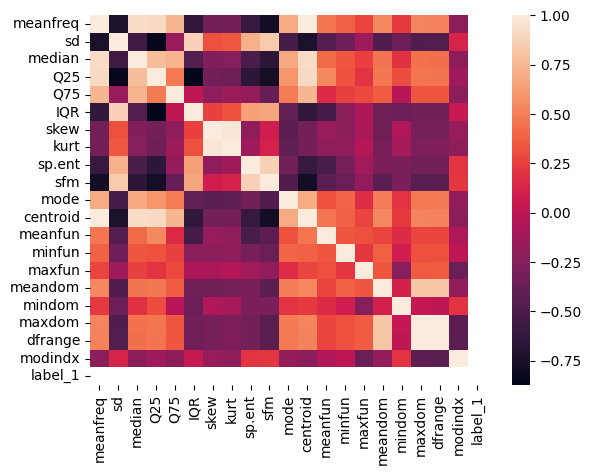

In [10]:
sns.heatmap(copy_voice_data.corr())

Задание 7.1

Начнём с решающего пня.

Создайте модель дерева решений максимальной глубины 1. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.


In [11]:
X = voice_data.drop(['label'], axis=1)
y = voice_data['label']

In [12]:
# Формируем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
print('Train shape: {}'.format(X_train.shape))
print('Test shape: {}'.format(X_test.shape))

Train shape: (2534, 20)
Test shape: (634, 20)


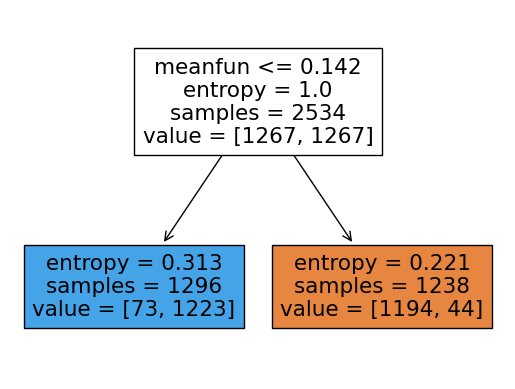

In [13]:
# Инициализируем модель дерева решений с максимальной глубиной 1 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=1, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
);

In [14]:
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9558359621451105

Задание 7.2
 
Увеличим глубину дерева.

Создайте дерево решений с максимальной глубиной 2. В качестве критерия информативности используйте энтропию Шеннона.

Обучите модель на тренировочной выборке и визуализируйте её в виде графа.

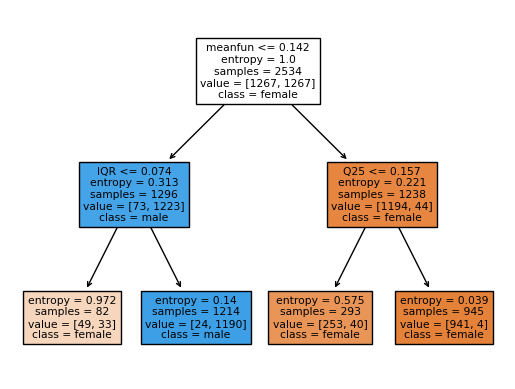

In [16]:
# Инициализируем модель дерева решений с максимальной глубиной 2 и обучаем ее
dt = tree.DecisionTreeClassifier(
    max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
tree.plot_tree(
    decision_tree=dt, #дерево решений 
    feature_names=X.columns, #имена факторов
    filled=True, #расцветка
    impurity=True, #отображать ли неоднородность в вершинах
    class_names=dt.classes_ # отображать наименования классов
);

In [17]:
y_pred = dt.predict(X_test)
metrics.accuracy_score(y_test, y_pred)

0.9621451104100947

Задание 7.3
 
Давайте дадим дереву решений полную свободу.

Создайте дерево решений, не ограничивая его максимальную глубину. В качестве критерия информативности используйте энтропию Шеннона.

В качестве значения параметра random_state возьмите 0.

Обучите модель на тренировочной выборке.

In [18]:
# Инициализируем модель дерева решений с максимальной глубиной 2 и обучаем ее
dt = tree.DecisionTreeClassifier(
    #max_depth=2, #глубина
    criterion='entropy', #критерий информативности
    random_state=0 #генератор случайных чисел
)
dt.fit(X_train, y_train)
# Визуализируем дерево решений в виде графа
#tree.plot_tree(
#    decision_tree=dt, #дерево решений 
#    feature_names=X.columns, #имена факторов
#    filled=True, #расцветка
#    impurity=True, #отображать ли неоднородность в вершинах
#    class_names=dt.classes_ # отображать наименования классов
#);

print('Глубина дерева =', dt.get_depth())
print('Количество листьев =', dt.get_n_leaves())

Глубина дерева = 12
Количество листьев = 54


In [19]:
y_pred_train = dt.predict(X_train)
y_pred_test = dt.predict(X_test)
print('Accuracy train = ',metrics.accuracy_score(y_train, y_pred_train))
print('Accuracy test = ',metrics.accuracy_score(y_test, y_pred_test))

Accuracy train =  1.0
Accuracy test =  0.973186119873817


Задание 7.4
 
Давайте попробуем найти оптимальные внешние параметры модели дерева решений для поставленной задачи. Воспользуемся классическим методом подбора гиперпараметров — перебором на сетке с кросс-валидацией (Grid SearchCV).

In [20]:
# Задаём сетку параметров
param_grid = {
    'criterion': ['gini', 'entropy'], #критерий информативности
    'max_depth': [4, 5, 6, 7, 8, 9, 10], #максимальная глубина дерева
    'min_samples_split': [3, 4, 5, 10] #минимальное количество объектов, необходимое для сплита
}

In [21]:
# Задаём метод кросс-валидации
cv = model_selection.StratifiedKFold(n_splits=5)

In [23]:
grid_search = model_selection.GridSearchCV(
    estimator=tree.DecisionTreeClassifier(
        random_state=0, #генератор случайных чисел
    ), 
    cv = cv,
    param_grid=param_grid
)  

In [30]:
grid_search.fit(X_train, y_train) 
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test)
print("accuracy на тренировочном наборе: {:.3f}".format(metrics.accuracy_score(y_train, y_train_pred)))
print("accuracy на тестовом наборе: {:.3f}".format(metrics.accuracy_score(y_test, y_test_pred)))
print("Наилучшие значения гиперпараметров: {}".format(grid_search.best_params_))

accuracy на тренировочном наборе: 0.996
accuracy на тестовом наборе: 0.970
Наилучшие значения гиперпараметров: {'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 3}


In [37]:
dt1 = tree.DecisionTreeClassifier(criterion = grid_search.best_params_['criterion'],
                                  max_depth = grid_search.best_params_['max_depth'],
                                  min_samples_split = grid_search.best_params_['min_samples_split'])

In [38]:
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_split=3)

In [39]:
print(dt1.feature_importances_)

[4.01030019e-03 6.06505587e-03 3.40956697e-04 0.00000000e+00
 6.61401163e-03 5.53884216e-02 2.60681320e-03 6.54448336e-03
 2.11877566e-03 1.79249623e-02 4.17392598e-03 5.98504769e-03
 8.63119172e-01 1.56193524e-02 0.00000000e+00 1.39407415e-03
 1.53411933e-03 0.00000000e+00 5.49416134e-03 1.06636662e-03]


In [40]:
dt1_graph = pd.Series(dt1.feature_importances_,
                         X_train.columns)

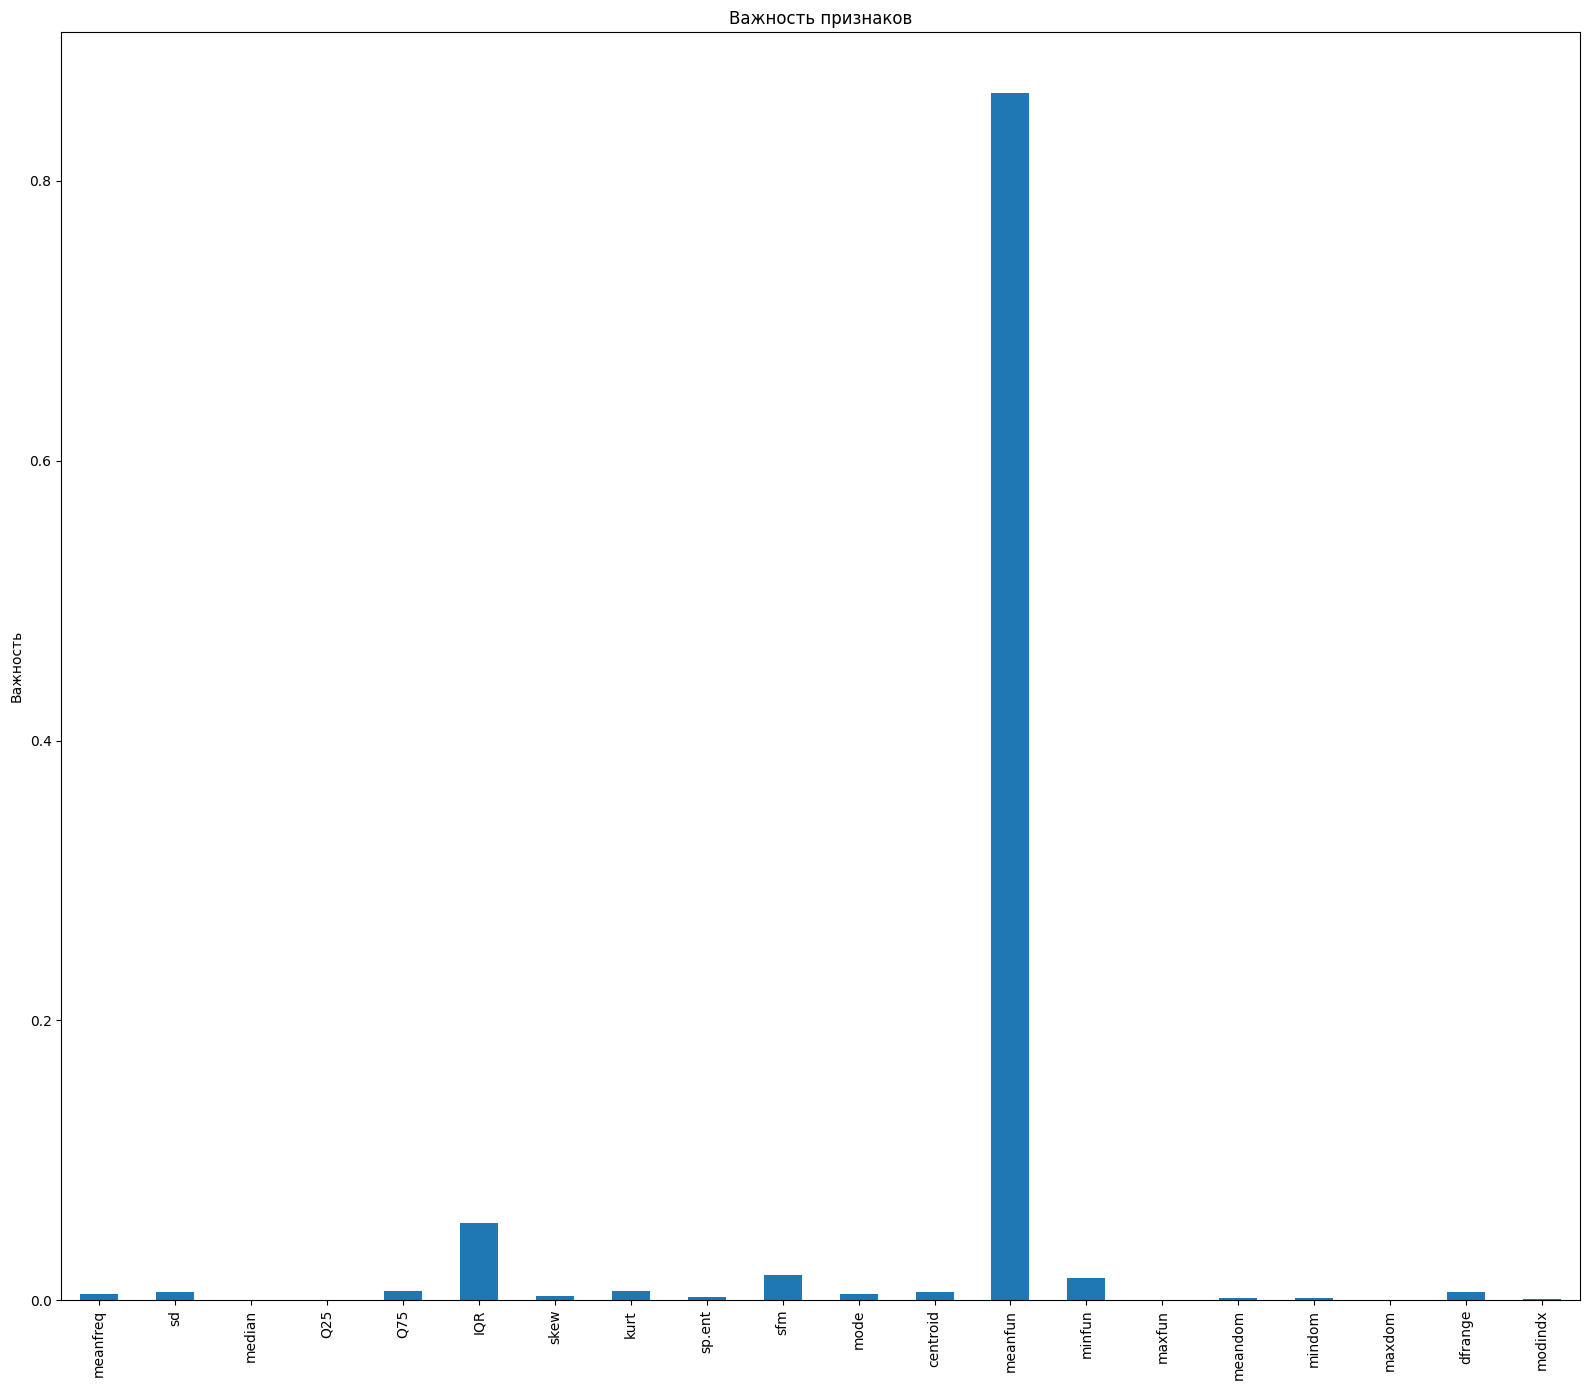

In [41]:
fig, ax = plt.subplots(figsize=(16,14))
dt1_graph.plot.bar(ax=ax)
ax.set_title("Важность признаков")
ax.set_ylabel('Важность')
fig.tight_layout()